# Experiment Monitoring: Mlflow

In [34]:
!python -V

Python 3.8.16


In [35]:
import pandas as pd

In [36]:
import pickle

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [39]:
pip install mlflow

Note: you may need to restart the kernel to use updated packages.


In [7]:
import mlflow

mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("MLOPS Zoom Class Experiment")

<Experiment: artifact_location=('/mnt/c/Users/maria/OneDrive/1. Machine Learning Career/DataTalks Club- MLOPS '
 'Zoomcamp/Module 2/mlruns/1'), creation_time=1685390798547, experiment_id='1', last_update_time=1685390798547, lifecycle_stage='active', name='MLOPS Zoom Class Experiment', tags={}>

In [8]:
df = pd.read_parquet('./data/green_tripdata_2022-01.parquet')

df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

df = df[(df.duration >= 1) & (df.duration <= 60)]

categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

df[categorical] = df[categorical].astype(str)

In [9]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

7.723146724324908

/tmp/ipykernel_543/1672306066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/tmp/ipykernel_543/1672306066.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


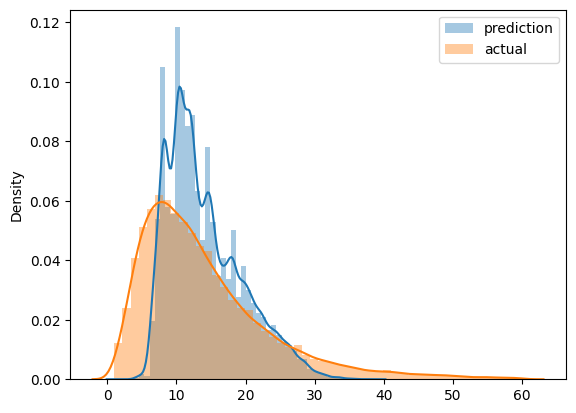

In [10]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [11]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [12]:
df_train = read_dataframe('./data/green_tripdata_2022-01.parquet')
df_val = read_dataframe('./data/green_tripdata_2022-02.parquet')

In [13]:
len(df_train), len(df_val)

(59603, 66097)

In [14]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [15]:
categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [16]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [17]:

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

6.928931233898232

In [18]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

In [33]:
import mlflow

In [20]:
with mlflow.start_run():
    
    mlflow.set_tag("developer", "Uchenna")
    mlflow.log_param("train-data-path", "./data/green_tripdata_2022-01.parquet")
    mlflow.log_param("valid-data-path", "./data/green_tripdata_2022-02.parquet")
    alpha = 0.01
    mlflow.log_param("alpha",alpha)
lr = Lasso(alpha)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

rmse = mean_squared_error(y_val, y_pred, squared=False)
mlflow.log_metric("rmse",rmse)

To view User Interface using Databricks since SQLite was not loading...

Run the following in command line and enter user name(uokoloekwe@gmail.com) and password: Chizzy

In [24]:
import mlflow
mlflow.set_tracking_uri("databricks")
mlflow.set_experiment("/Users/uokoloekwe@gmail.com/MLFlow Zoomcamp")

2023/05/29 18:29:06 INFO mlflow.tracking.fluent: Experiment with name '/Users/uokoloekwe@gmail.com/MLFlow Zoomcamp' does not exist. Creating a new experiment.


<Experiment: artifact_location='dbfs:/databricks/mlflow-tracking/4105700166558086', creation_time=1685406547787, experiment_id='4105700166558086', last_update_time=1685406547787, lifecycle_stage='active', name='/Users/uokoloekwe@gmail.com/MLFlow Zoomcamp', tags={'mlflow.experiment.sourceName': '/Users/uokoloekwe@gmail.com/MLFlow Zoomcamp',
 'mlflow.experimentType': 'MLFLOW_EXPERIMENT',
 'mlflow.ownerEmail': 'uokoloekwe@gmail.com',
 'mlflow.ownerId': '1532440576552063'}>

In [44]:
with mlflow.start_run():
    
    mlflow.set_tag("developer", "Uchenna")
    mlflow.log_param("train-data-path", "./data/green_tripdata_2022-01.parquet")
    mlflow.log_param("valid-data-path", "./data/green_tripdata_2022-02.parquet")
    alpha = 0.05
    mlflow.log_param("alpha",alpha)
lr = Lasso(alpha)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

rmse = mean_squared_error(y_val, y_pred, squared=False)
mlflow.log_metric("rmse",rmse)

In [45]:
mlflow.end_run()

In [46]:
import os
import pickle
import click

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error




In [47]:
def load_pickle(filename: str):
    with open(filename, "rb") as f_in:
        return pickle.load(f_in)








In [51]:
with mlflow.start_run():
    
    alpha = 0.05
    max_depth=10
    mlflow.set_tag("developer", "Uchenna")
    mlflow.log_param("train-data-path", "./data/green_tripdata_2022-01.parquet")
    mlflow.log_param("valid-data-path", "./data/green_tripdata_2022-02.parquet")
    mlflow.log_param("alpha",alpha)
    mlflow.log_param("max_depth",max_depth)

def run_train(data_path: str):

    X_train, y_train = load_pickle(os.path.join(data_path, "train.pkl"))
    X_val, y_val = load_pickle(os.path.join(data_path, "val.pkl"))

    rf = RandomForestRegressor(max_depth=max_depth, random_state=0)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)

    rmse = mean_squared_error(y_val, y_pred, squared=False)
    mlflow.log_metric("rmse",rmse)

In [52]:
mlflow.end_run()

# Model Optimization

In [54]:
pip install optuna

  Using cached optuna-3.2.0-py3-none-any.whl (390 kB)
  Using cached colorlog-6.7.0-py2.py3-none-any.whl (11 kB)
  Using cached cmaes-0.9.1-py3-none-any.whl (21 kB)
Note: you may need to restart the kernel to use updated packages.


In [55]:
import os
import pickle
import click
import mlflow
import optuna

from optuna.samplers import TPESampler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [58]:
#mlflow.set_tracking_uri("http://127.0.0.1:5000") ##Tracking on Databricks
mlflow.set_tracking_uri("databricks")
mlflow.set_experiment("/Users/uokoloekwe@gmail.com/MLFlow Zoomcamp Random Forest Hyperopt")

2023/05/30 11:18:19 INFO mlflow.tracking.fluent: Experiment with name '/Users/uokoloekwe@gmail.com/MLFlow Zoomcamp Random Forest Hyperopt' does not exist. Creating a new experiment.


<Experiment: artifact_location='dbfs:/databricks/mlflow-tracking/299707463258061', creation_time=1685467100328, experiment_id='299707463258061', last_update_time=1685467100328, lifecycle_stage='active', name='/Users/uokoloekwe@gmail.com/MLFlow Zoomcamp Random Forest Hyperopt', tags={'mlflow.experiment.sourceName': '/Users/uokoloekwe@gmail.com/MLFlow Zoomcamp '
                                 'Random Forest Hyperopt',
 'mlflow.experimentType': 'MLFLOW_EXPERIMENT',
 'mlflow.ownerEmail': 'uokoloekwe@gmail.com',
 'mlflow.ownerId': '1532440576552063'}>

In [59]:
def load_pickle(filename):
    with open(filename, "rb") as f_in:
        return pickle.load(f_in)


In [86]:
def run_optimization(data_path: str, num_trials: int):
    
    

    X_train, y_train = load_pickle(os.path.join(data_path, "train.pkl"))
    X_val, y_val = load_pickle(os.path.join(data_path, "val.pkl"))
    
    
with mlflow.start_run():

    def objective(trial):
        params = {
                'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
                'max_depth': trial.suggest_int('max_depth', 1, 20, 1),
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 10, 1),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4, 1),
                'random_state': 42,
                'n_jobs': -1
            }

        rf = RandomForestRegressor(**params)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        mlflow.log_metric("rmse", rmse)

        return rmse

    sampler = TPESampler(seed=42)
    study = optuna.create_study(direction="minimize", sampler=sampler)
    num_trials= 50
    study.optimize(objective, n_trials=num_trials)
    mlflow.log_metric("rmse", rmse)


[I 2023-05-30 12:23:11,222] A new study created in memory with name: no-name-c4e09ec9-d2d9-409e-994a-d29eb50128e0
[I 2023-05-30 12:23:13,449] Trial 0 finished with value: 6.012747224033297 and parameters: {'n_estimators': 25, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 0 with value: 6.012747224033297.
[I 2023-05-30 12:23:13,744] Trial 1 finished with value: 6.249433998787504 and parameters: {'n_estimators': 16, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 0 with value: 6.012747224033297.
[I 2023-05-30 12:23:15,764] Trial 2 finished with value: 6.039045655830305 and parameters: {'n_estimators': 34, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 0 with value: 6.012747224033297.
[I 2023-05-30 12:23:16,396] Trial 3 finished with value: 6.179387143797027 and parameters: {'n_estimators': 44, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 0 with value: 6.012747224

In [103]:
mlflow.end_run()

# Using Autolog

In [104]:
mlflow.autolog()
def objective(trial):
        params = {
                'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
                'max_depth': trial.suggest_int('max_depth', 1, 20, 1),
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 10, 1),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4, 1),
                'random_state': 42,
                'n_jobs': -1
            }

        rf = RandomForestRegressor(**params)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        mlflow.log_metric("rmse", rmse)

        return rmse

sampler = TPESampler(seed=42)
study = optuna.create_study(direction="minimize", sampler=sampler)
num_trials= 50
study.optimize(objective, n_trials=num_trials)
mlflow.log_metric("rmse", rmse)
autolog_run = mlflow.last_active_run()


2023/05/30 12:55:17 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
[I 2023-05-30 12:55:17,322] A new study created in memory with name: no-name-5766ea2b-6e9a-4be4-b32d-fe75a429431a
2023/05/30 12:55:17 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'a43260ea9e1f4b4ba4ab0d9a273dd44d', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
[I 2023-05-30 12:55:28,039] Trial 0 finished with value: 6.012747224033297 and parameters: {'n_estimators': 25, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 0 with value: 6.012747224033297.
[I 2023-05-30 12:55:31,818] Trial 1 finished with value: 6.249433998787504 and parameters: {'n_estimators': 16, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 0 with value: 6.012747224033297.
2023/05/30 12:55:37 WARNING mlflow.utils.autologging_utils: Encountered unexpec

In [105]:
mlflow.end_run()

# Choosing the Best Model

copy parametrs from databricks/mlflow ui

In [92]:
import os
import pickle
import click
import mlflow

from mlflow.entities import ViewType
from mlflow.tracking import MlflowClient
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Preprocess Test data

In [134]:
df_test = read_dataframe('./data/green_tripdata_2022-03.parquet')

In [135]:
df_test['PU_DO'] = df_test['PULocationID'] + '_' + df_test['DOLocationID']

In [136]:
test_dicts = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(test_dicts)

In [137]:
target = 'duration'
y_test = df_test[target].values

In [138]:
def objective(trial):
        params = {
                        'bootstrap': True,
                        'ccp_alpha': 0.0,
                        'criterion': "squared_error",
                        'max_depth': 4,
                        'max_features': "auto",
                        'max_leaf_nodes': None,
                        'max_samples': None,
                        'min_impurity_decrease':0.0,
                        'min_samples_leaf':4,
                        'min_samples_split':2,
                        'min_weight_fraction_leaf':0.0,
                        'n_estimators':16,
                        'n_jobs':-1,
                        'oob_score':False,
                        'random_state':42,
                        'verbose':0,
                        'warm_start':False  } 
            

        rf = RandomForestRegressor(**params)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        mlflow.log_metric("rmse", rmse)

        return rmse

sampler = TPESampler(seed=42)
study = optuna.create_study(direction="minimize", sampler=sampler)
num_trials= 50
study.optimize(objective, n_trials=num_trials)
mlflow.log_metric("rmse", rmse)

[I 2023-05-30 13:41:20,428] A new study created in memory with name: no-name-6a482d78-2b8d-4d8b-a981-86f613759e62
[I 2023-05-30 13:41:26,504] Trial 0 finished with value: 6.346932916250552 and parameters: {}. Best is trial 0 with value: 6.346932916250552.
[I 2023-05-30 13:41:31,385] Trial 1 finished with value: 6.346932916250552 and parameters: {}. Best is trial 0 with value: 6.346932916250552.
[I 2023-05-30 13:41:35,089] Trial 2 finished with value: 6.346932916250552 and parameters: {}. Best is trial 0 with value: 6.346932916250552.
[I 2023-05-30 13:41:38,681] Trial 3 finished with value: 6.346932916250552 and parameters: {}. Best is trial 0 with value: 6.346932916250552.
[I 2023-05-30 13:41:42,157] Trial 4 finished with value: 6.346932916250552 and parameters: {}. Best is trial 0 with value: 6.346932916250552.
[I 2023-05-30 13:41:46,711] Trial 5 finished with value: 6.346932916250552 and parameters: {}. Best is trial 0 with value: 6.346932916250552.
[I 2023-05-30 13:41:50,111] Trial 

In [98]:

RF_PARAMS = ['max_depth', 'n_estimators', 'min_samples_split', 'min_samples_leaf', 'random_state', 'n_jobs']
HPO_EXPERIMENT_NAME = "MLFlow Zoomcamp Random Forest Hyperopt"
EXPERIMENT_NAME = "funny-roo-797" #best model experiment name from databricks

mlflow.sklearn.autolog()

In [99]:
def train_and_log_model(data_path, params):
    X_train, y_train = load_pickle(os.path.join(data_path, "train.pkl"))
    X_val, y_val = load_pickle(os.path.join(data_path, "val.pkl"))
    X_test, y_test = load_pickle(os.path.join(data_path, "test.pkl"))

    with mlflow.start_run():
        for param in RF_PARAMS:
            params[param] = int(params[param])

        rf = RandomForestRegressor(**params)
        rf.fit(X_train, y_train)

        # Evaluate model on the validation and test sets
        val_rmse = mean_squared_error(y_val, rf.predict(X_val), squared=False)
        mlflow.log_metric("val_rmse", val_rmse)
        test_rmse = mean_squared_error(y_test, rf.predict(X_test), squared=False)
        mlflow.log_metric("test_rmse", test_rmse)

In [100]:

def run_register_model(data_path: str, top_n: int):

    client = MlflowClient()

    # Retrieve the top_n model runs and log the models
    experiment = client.get_experiment_by_name(HPO_EXPERIMENT_NAME)
    runs = client.search_runs(
        experiment_ids=experiment.experiment_id,
        run_view_type=ViewType.ACTIVE_ONLY,
        max_results=top_n,
        order_by=["metrics.rmse ASC"]
    )
    for run in runs:
        train_and_log_model(data_path=data_path, params=run.data.params)

    # Select the model with the lowest test RMSE
    experiment = client.get_experiment_by_name(EXPERIMENT_NAME)
    # best_run = client.search_runs( ...  )[0]

    # Register the best model
    # mlflow.register_model( ... )